b) Läs in 10 bilder slumpmässigt, plotta dem och extrahera deras labels och skriv ut i titeln.

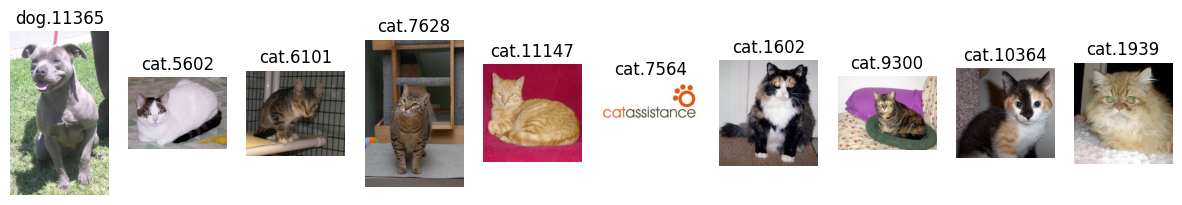

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random

current_path = Path().absolute()
train_path = current_path / "original_data" / "train"

train_list = list(train_path.iterdir())

num_images_to_sample = min(10, len(train_list))

if num_images_to_sample > 0:
    pictures = random.sample(train_list, num_images_to_sample)

    labels = [path.stem.split('_')[0] for path in pictures]

    fig, axes = plt.subplots(1, num_images_to_sample, figsize=(15, 3))
    if num_images_to_sample > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    for ax, img_path, label in zip(axes, pictures, labels):
        image = plt.imread(img_path)
        ax.imshow(image)
        ax.set_title(label)
        ax.axis("off")

    plt.show()



In [5]:
"""

# Definiera de olika sökvägarna
experiment_small_data = Path("experiment_small_data")
experiment_tiny_data = Path("experiment_tiny_data")
original_data = Path("original_data")


# Skapa mappstrukturen
experiment_small_data.mkdir(parents=True, exist_ok=True)
experiment_tiny_data.mkdir(parents=True, exist_ok=True)
(original_data / "test").mkdir(parents=True, exist_ok=True)
(original_data / "train").mkdir(parents=True, exist_ok=True)

#Skapa undermappar i experiment_small_data och experiment_tiny_data
for folder in ["test", "train", "val"]:
    (experiment_small_data / folder).mkdir(exist_ok=True)
    (experiment_tiny_data / folder).mkdir(exist_ok=True)

# bugtest så vi vet om något går fel
for item in Path(".").rglob("*"):
     print(item) 

"""

experiment_small_data
experiment_tiny_data
Lab2_DL.pdf
Labb2.ipynb
original_data
experiment_small_data\test
experiment_small_data\train
experiment_small_data\val
experiment_tiny_data\test
experiment_tiny_data\train
experiment_tiny_data\val
original_data\test
original_data\train
original_data\test\1.jpg
original_data\test\10.jpg
original_data\test\100.jpg
original_data\test\1000.jpg
original_data\test\10000.jpg
original_data\test\10001.jpg
original_data\test\10002.jpg
original_data\test\10003.jpg
original_data\test\10004.jpg
original_data\test\10005.jpg
original_data\test\10006.jpg
original_data\test\10007.jpg
original_data\test\10008.jpg
original_data\test\10009.jpg
original_data\test\1001.jpg
original_data\test\10010.jpg
original_data\test\10011.jpg
original_data\test\10012.jpg
original_data\test\10013.jpg
original_data\test\10014.jpg
original_data\test\10015.jpg
original_data\test\10016.jpg
original_data\test\10017.jpg
original_data\test\10018.jpg
original_data\test\10019.jpg
origina

d) Nu ska du göra train|val|test split med följande splits:

experiment_small
* train - 1600 (800 dogs, 800 cats)
* val - 400 (200 dogs, 200 cats)
* test - 500 (250 dogs, 250 cats)

experiment_tiny (BONUS)
* train - 160 (80 dogs, 80 cats)
* val - 40 (20 dogs, 20 cats)
* test - 50 (25 dogs, 25 cats

In [39]:
import shutil

current_path = Path().absolute()
original_data = current_path / "original_data" / "train"
experiment_small_data = current_path / "experiment_small_data"
experiment_tiny_data = current_path / "experiment_tiny_data"

splits_info = {
    "experiment_small": {"train": 1600, "val": 400, "test": 500},
    "experiment_tiny": {"train": 160, "val": 40, "test": 50}
}

def setup_datasets(experiment_path, splits, source_data):
    experiment_path.mkdir(parents=True, exist_ok=True)

    images = list(source_data.glob("*.jpg"))
    random.shuffle(images)  

    for split_name, total_images in splits.items():
        split_path = experiment_path / split_name
        split_path.mkdir(parents=True, exist_ok=True)

        existing_images = list(split_path.glob("*.jpg"))
        num_existing = len(existing_images)
        num_needed = total_images - num_existing

        if num_needed > 0:
            images_to_move = images[:num_needed]
            images = images[num_needed:]  

            for image in images_to_move:
                shutil.move(str(image), str(split_path / image.name))
            print(f"Moved {len(images_to_move)} images to {split_path}. Total now: {num_existing + len(images_to_move)}")
        else:
            print(f"{split_name.capitalize()} split in {experiment_path.name} already has {num_existing} images, no more needed.")

setup_datasets(experiment_small_data, splits_info["experiment_small"], original_data)
setup_datasets(experiment_tiny_data, splits_info["experiment_tiny"], original_data)


Train split in experiment_small_data already has 1600 images, no more needed.
Val split in experiment_small_data already has 400 images, no more needed.
Test split in experiment_small_data already has 500 images, no more needed.
Train split in experiment_tiny_data already has 160 images, no more needed.
Val split in experiment_tiny_data already has 40 images, no more needed.
Test split in experiment_tiny_data already has 50 images, no more needed.
Dataset setup is complete!


---

 e) Läs in dataseten från experiment_small, experiment_tiny (BONUS) och plocka ut labelsvektorer, som
ska vara one-hot encoded med 0 och 1.
* plotta några bilder med deras respektive labels och kontrollera att det är korrekt.
* skapa lämplig plot för att kontrollera att dataseten är balanserade
* skapa lämplig plot för att kontrollera att dataseten är slumpade

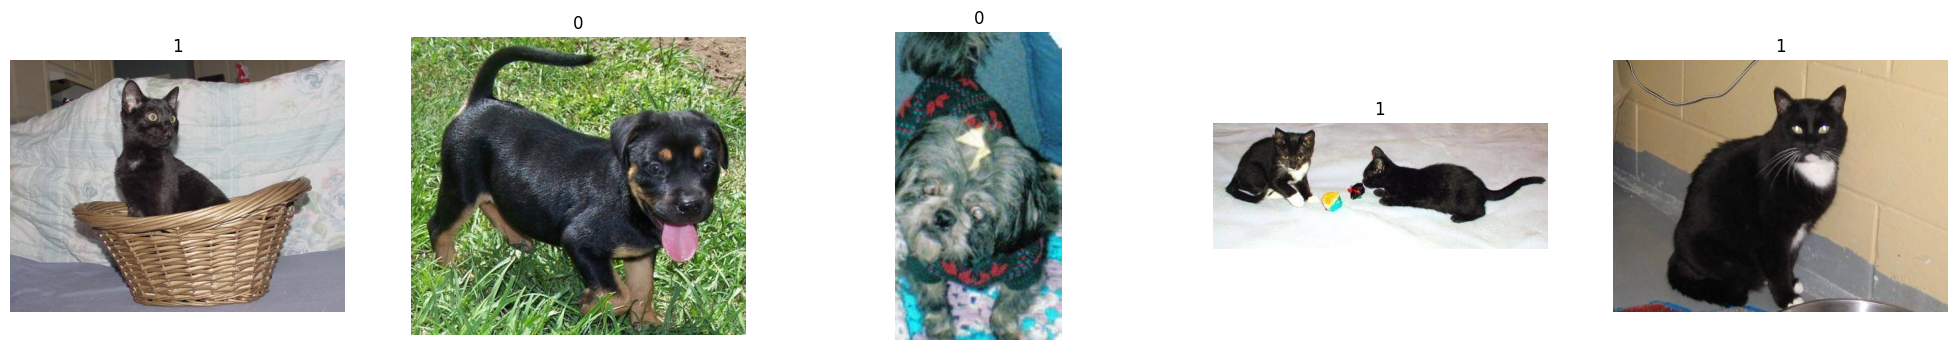

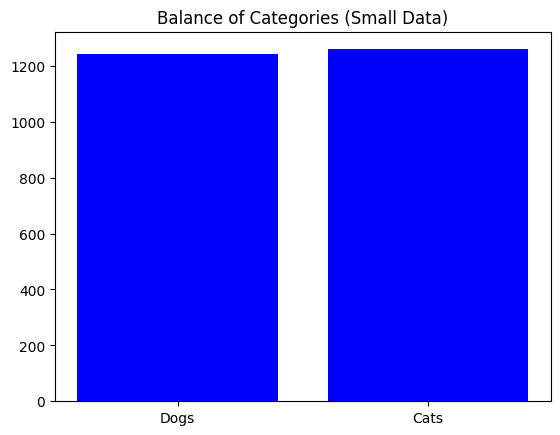

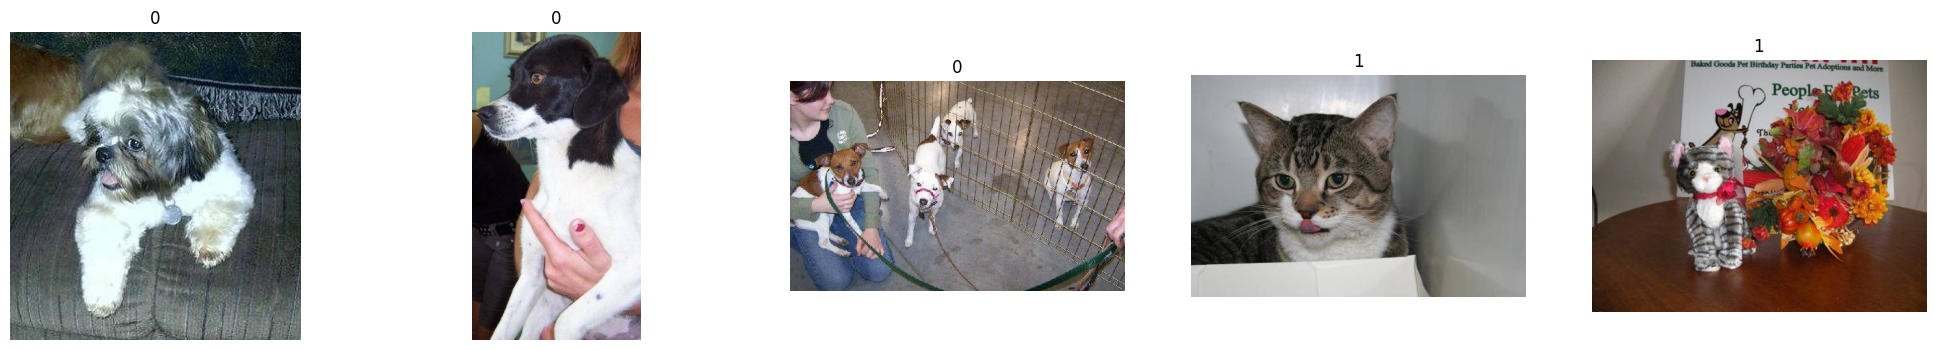

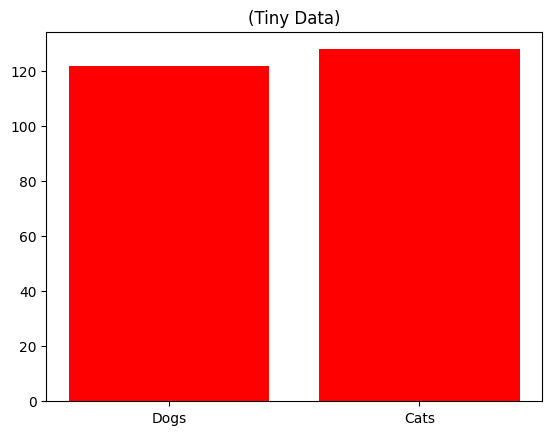

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from PIL import Image
import random

small_data = Path("experiment_small_data") 
tiny_data = Path("experiment_tiny_data") 

def load_data(dataset_path):
    images = []
    labels = []
    for image_path in dataset_path.rglob("*.jpg"):
        img = Image.open(image_path)
        images.append(np.array(img))
        
        label = 0 if "dog" in image_path.name.lower() else 1
        labels.append(label)

    combined = list(zip(images, labels))
    random.shuffle(combined)
    return combined

data_small = load_data(small_data)

fig, axes = plt.subplots(1, 5, figsize=(25, 4))
for i, (img, label) in enumerate(data_small[:5]):
    axes[i].imshow(img)
    axes[i].set_title(label)  
    axes[i].axis("off")
plt.show()

y_train_small = [label for _, label in data_small]
plt.figure()
plt.hist(y_train_small, bins=[-0.5, 0.5, 1.5], color="blue", rwidth=0.8)
plt.xticks([0, 1], ["Dogs", "Cats"])
plt.title("Small Data")
plt.show()

data_tiny = load_data(tiny_data)

fig, axes = plt.subplots(1, 5, figsize=(25, 4))
for i, (img, label) in enumerate(data_tiny[:5]):
    axes[i].imshow(img)
    axes[i].set_title(label)  
    axes[i].axis("off")
plt.show()

y_train_tiny = [label for _, label in data_tiny]
plt.figure()
plt.hist(y_train_tiny, bins=[-0.5, 0.5, 1.5], color="red", rwidth=0.8)
plt.xticks([0, 1], ["Dogs", "Cats"])
plt.title("(Tiny Data")
plt.show()


---
# 1. Bildbehandling (*)
Uppgifterna nedan ska upprepas för respektive experimentdataset om du också väljer att arbeta med
tinydatasetet.

 a) Skapa en plot för att visualisera bildstorlekarna i träningsdatan. Använd seaborns jointplot.

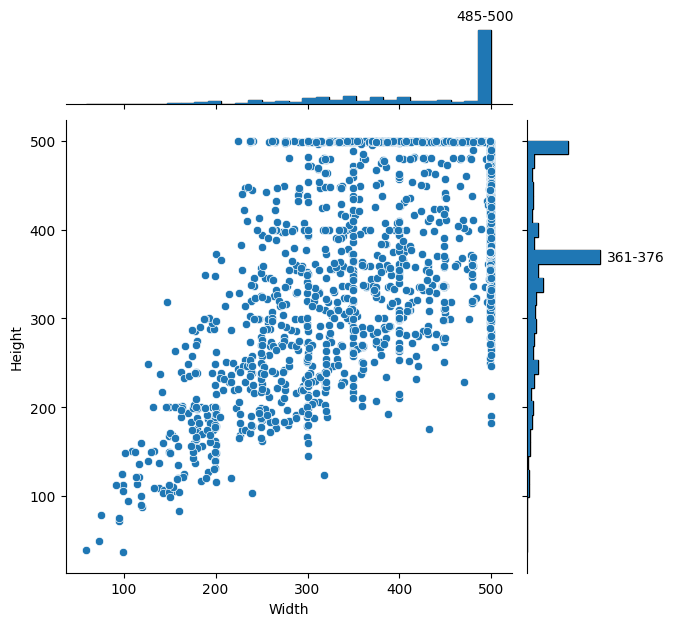

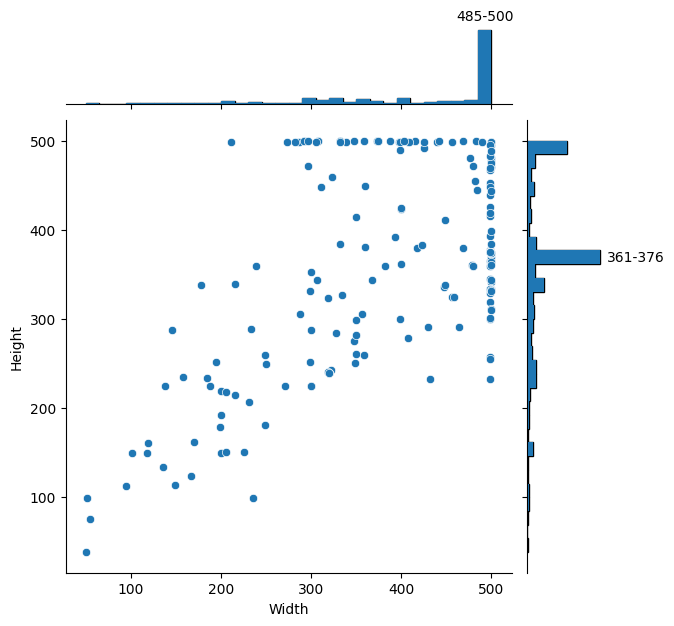

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.image import imread

def get_image_sizes(data_path):
    """Gather image dimensions for images in the specified directory."""
    sizes = []
    categories = ['train', 'val', 'test']
    for category in categories:
        cat_dir = data_path / category
        files = list(cat_dir.glob("*"))
        for image_path in files:
            img = imread(str(image_path))
            if len(img.shape) == 3:
                height, width, _ = img.shape
                sizes.append((width, height))
    return sizes

def plot_image_sizes(sizes, title):
    """Plot the image sizes using a jointplot and annotate the highest histogram bars with bin range."""
    widths, heights = zip(*sizes)
    widths = np.array(widths)
    heights = np.array(heights)

    # Create jointplot
    joint_plot = sns.jointplot(x=widths, y=heights, kind='scatter', marginal_kws=dict(bins=30, fill=True))
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.suptitle(title)

    # Annotate the highest bar in the x histogram
    n, bins, patches = joint_plot.ax_marg_x.hist(widths, bins=30, fill=True)
    max_idx = np.argmax(n)
    max_bin_start = bins[max_idx]
    max_bin_end = bins[max_idx + 1]
    joint_plot.ax_marg_x.annotate(f'{int(max_bin_start)}-{int(max_bin_end)}', xy=((max_bin_start + max_bin_end) / 2, max(n)), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

    # Annotate the highest bar in the y histogram
    n, bins, patches = joint_plot.ax_marg_y.hist(heights, bins=30, fill=True, orientation='horizontal')
    max_idx = np.argmax(n)
    max_bin_start = bins[max_idx]
    max_bin_end = bins[max_idx + 1]
    joint_plot.ax_marg_y.annotate(f'{int(max_bin_start)}-{int(max_bin_end)}', xy=(max(n), (max_bin_start + max_bin_end) / 2), xytext=(5, 0), textcoords='offset points', ha='left', va='center')

    plt.show()

# Setup paths
experiment_small_data = Path("experiment_small_data")
experiment_tiny_data = Path("experiment_tiny_data")

# Get sizes from each dataset
image_sizes_small = get_image_sizes(experiment_small_data)
image_sizes_tiny = get_image_sizes(experiment_tiny_data)

# Generate plots with annotations
plot_image_sizes(image_sizes_small, " ")
plot_image_sizes(image_sizes_tiny, "")


---


In [32]:
import numpy as np
from pathlib import Path
from PIL import Image
import os

def resize_and_load_images(data_path, target_size=(224, 224)):
    """
    Resize images to a uniform size and load them into a NumPy array.

    Args:
    data_path (Path): Path to the directory containing image subdirectories.
    target_size (tuple): Tuple indicating the new size (width, height).

    Returns:
    numpy.ndarray: Array of images with shape (samples, rows, cols, color_channels).
    """
    data_path = Path(data_path)
    categories = ['train', 'val', 'test']  # Example categories
    images = []
    for category in categories:
        cat_dir = data_path / category
        files = list(cat_dir.glob("*"))
        for image_path in files:
            img = Image.open(image_path)
            img = img.resize(target_size, Image.ANTIALIAS)  # Resize the image
            img_array = np.array(img)
            if img_array.ndim == 2:  # Convert grayscale to RGB
                img_array = np.stack([img_array]*3, axis=-1)
            images.append(img_array)
    
    return np.stack(images, axis=0)  # Stack images into a single numpy array

# Setup paths
data_path = Path("path_to_your_data_folder")

# Resize images and load into an array
image_data_array = resize_and_load_images(data_path)

# Optionally, save the array to disk for future use
np.save('resized_image_data.npy', image_data_array)

# Check the shape of the resulting array
print("Shape of the image data array:", image_data_array.shape)


ValueError: need at least one array to stack